In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import qp
import individual_metrics as inmet
import skgof
%matplotlib inline

# Data with no cuts

In [2]:
infile = "/Users/samschmidt/PZPAPER/mystuff/test_magscat_trainingfile_probs.out"
szfile = "/Users/samschmidt/PZPAPER/mystuff/train_justsz.out"
z_array = np.arange(0.0050,2.1100,0.0100) #this is the grid output by BPZ for my runs
z_trues = np.loadtxt(szfile,skiprows=1)
alldata = np.loadtxt(infile,skiprows=1)
ID = alldata[:,0]
pzs = alldata[:,1:]
ngals = len(ID)

In [3]:
bpz_approx_pdf = qp.Ensemble(pzs.shape[0],gridded=(z_array,pzs))

made the pool of 4 in 0.0492050647736
made the catalog in 210.825731039


In [4]:
nzobj = inmet.NzSumEvaluateMetric(bpz_approx_pdf,z_trues,eval_grid=z_array,using='gridded',dx=0.0001)

In [5]:
ks_stat,ks_pval = nzobj.NZKS()
print ks_stat
print ks_pval

0.0351397367607
1.05585916058e-119


In [6]:
cvm_stat,cvm_pval = nzobj.NZCVM()
print cvm_stat
print cvm_pval

29.8158379622
9.89887141734e-06


In [7]:
zmin = min(z_trues)
zmax = max(z_trues)
print zmin,zmax

0.016 2.0


In [8]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 0.005, vmax=2.11, delv=0.01)
print ad_stat
print ad_pval

using 0.005000 and 2.110000 for vmin and vmax

251.666649377
5.39709099634e-09


In [9]:
ad_stat,ad_pval = nzobj.NZAD(vmin = zmin, vmax=zmax, delv=0.01)
print ad_stat
print ad_pval

using 0.016000 and 2.000000 for vmin and vmax

283.375125129
5.39747935235e-09


In [10]:
ad_stat,ad_pval = nzobj.NZAD(vmin = 0.3, vmax=1.7, delv=0.01)
print ad_stat
print ad_pval

using 0.300000 and 1.700000 for vmin and vmax

45.5512476618
6.03391059339e-09


# Test KL Divergence with samples of z_trues

Created a KDE interpolator for the samples parametrization.
interpolating between 0.016 and 2.0 using samples
Plotted samples


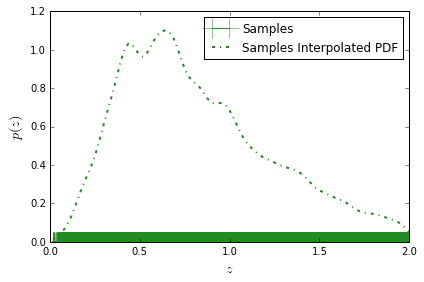

In [11]:
szsamplepdf = qp.PDF(samples=z_trues)
szsamplepdf.plot()

In [14]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(0.005,2.11),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.005 and 2.109 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.005 and 2.109 using gridded
almost normalized integrals
0.00999666932223


In [17]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(-0.200,2.31),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -0.2 and 2.309 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -0.2 and 2.309 using gridded
almost normalized integrals
0.0151677811129


In [15]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(zmin,zmax),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.016 and 1.999 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.016 and 1.999 using gridded
almost normalized integrals
0.00823084557357


In [16]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(0.3,1.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.3 and 1.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.3 and 1.699 using gridded
almost normalized integrals
0.00214046988672


In [18]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdf,nzobj.stackpz,limits=(-1.3,3.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -1.3 and 3.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -1.3 and 3.699 using gridded
almost normalized integrals
0.0154118113516


In [25]:
plotarray = np.arange(0.0,2.2,0.005)
pzsumvec = nzobj.stackpz.evaluate(plotarray,'gridded',False,False)
sztruevec = szsamplepdf.evaluate(plotarray,'samples',False,False)

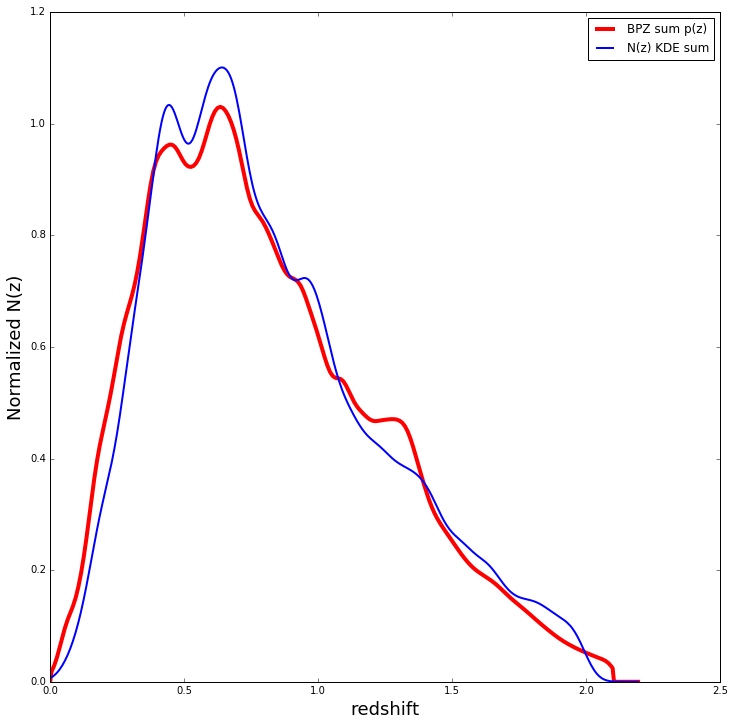

In [29]:
fig = plt.figure(figsize=(12,12))
plt.plot(pzsumvec[0],pzsumvec[1],lw=4,c='r',label='BPZ sum p(z)')
plt.plot(sztruevec[0],sztruevec[1],lw=2,c='b',label='N(z) KDE sum')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.legend()

In [74]:
pzcdf = np.cumsum(pzsumvec[1])*0.005
szcdf = np.cumsum(sztruevec[1])*0.005

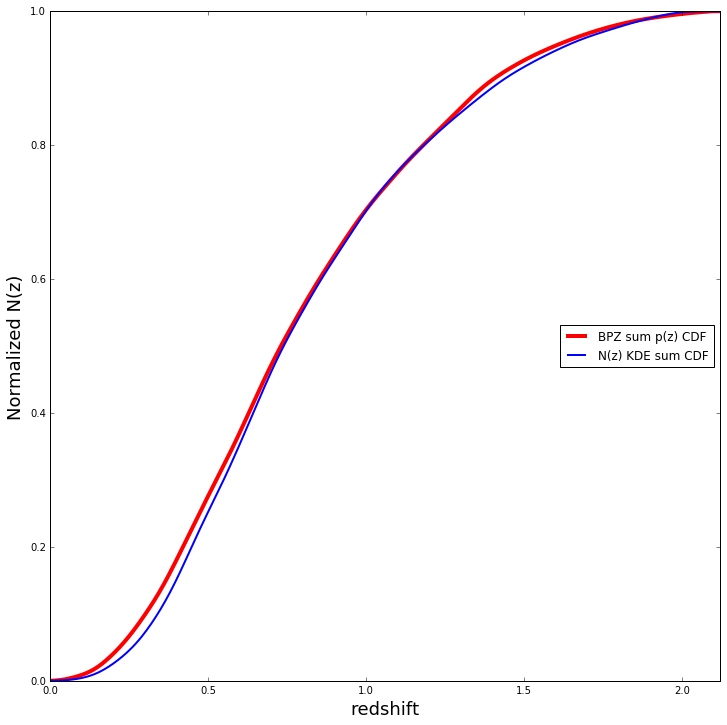

In [77]:
fig = plt.figure(figsize=(12,12))
plt.plot(pzsumvec[0],pzcdf,lw=4,c='r',label='BPZ sum p(z) CDF')
plt.plot(sztruevec[0],szcdf,lw=2,c='b',label='N(z) KDE sum CDF')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.xlim([0,2.12])
plt.ylim([0.0,1.0])
plt.legend(loc=5)

# Data with i<25.3 cut

In [30]:
newfile = "train_idszmag.out"
newdata = np.genfromtxt(newfile)
mags = newdata[:,2]

In [32]:
magcut = (mags<25.3)
goldzs = z_trues[magcut]
goldpzs = pzs[magcut]
goldnumgals = len(goldzs)
print goldnumgals
print goldpzs.shape

44404
(44404, 211)


In [33]:
gold_pdf = qp.Ensemble(goldpzs.shape[0],gridded=(z_array,goldpzs))

made the pool of 4 in 0.026193857193
made the catalog in 82.8849771023


In [40]:
nzgoldobj = inmet.NzSumEvaluateMetric(gold_pdf,goldzs,eval_grid=z_array,using='gridded',dx=0.0001)

In [41]:
ks_stat,ks_pval = nzgoldobj.NZKS()
print ks_stat
print ks_pval

0.0131189024692
4.56142017196e-07


In [42]:
cvm_stat,cvm_pval = nzgoldobj.NZCVM()
print cvm_stat
print cvm_pval

1.82909397712
3.09852195994e-05


In [51]:
goldzmin = min(goldzs)
goldzmax = max(goldzs)
print goldzmin,goldzmax

0.016 2.0


In [44]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = 0.005, vmax=2.11, delv=0.01)
print ad_stat
print ad_pval

using 0.005000 and 2.110000 for vmin and vmax

17.8281500176
1.35122961709e-08


In [52]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = goldzmin, vmax=goldzmax, delv=0.01)
print ad_stat
print ad_pval

using 0.016000 and 2.000000 for vmin and vmax

17.1677498668
1.35132091073e-08


In [46]:
ad_stat,ad_pval = nzgoldobj.NZAD(vmin = -.5, vmax=2.5, delv=0.01)
print ad_stat
print ad_pval

using -0.500000 and 2.500000 for vmin and vmax

17.9093282288
1.35122961709e-08


In [48]:
szsamplepdfgold = qp.PDF(samples=goldzs)

In [49]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(0.005,2.11),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.005 and 2.109 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.005 and 2.109 using gridded
almost normalized integrals
0.00554680907187


In [50]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(-1.3,3.7),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between -1.3 and 3.699 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between -1.3 and 3.699 using gridded
almost normalized integrals
0.0221802551812


In [53]:
kldtest = qp.utils.calculate_kl_divergence(szsamplepdfgold,nzgoldobj.stackpz,limits=(goldzmin,goldzmax),dx=0.001,vb=True)
print kldtest

Created a KDE interpolator for the samples parametrization.
interpolating between 0.016 and 1.999 using samples
almost normalized integrals
Created a `linear` interpolator for the gridded parametrization.
interpolating between 0.016 and 1.999 using gridded
almost normalized integrals
0.00519254441012


In [54]:
goldpzsumvec = nzgoldobj.stackpz.evaluate(plotarray,'gridded',False,False)
goldsztruevec = szsamplepdfgold.evaluate(plotarray,'samples',False,False)

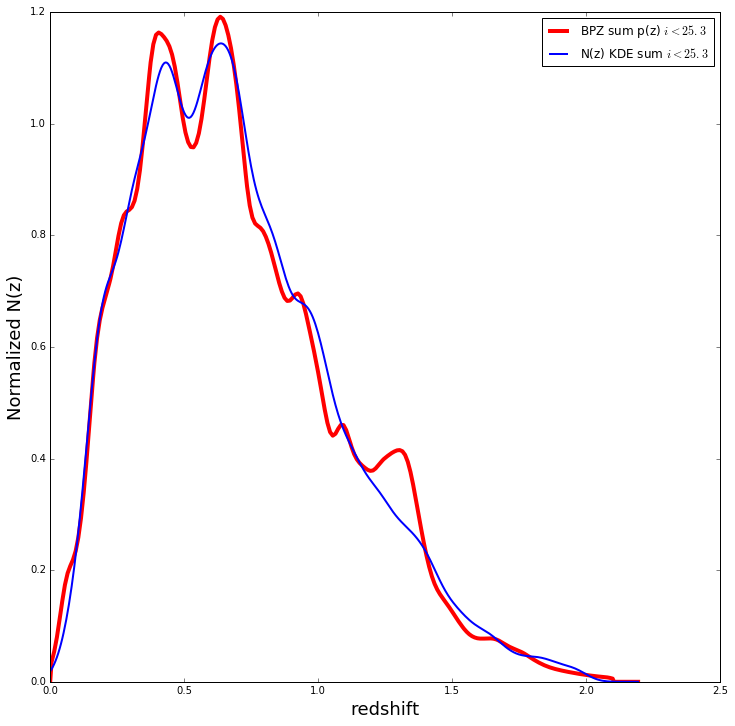

In [78]:
fig = plt.figure(figsize=(12,12))
plt.plot(goldpzsumvec[0],goldpzsumvec[1],lw=4,c='r',label='BPZ sum p(z) $i<25.3$')
plt.plot(goldsztruevec[0],goldsztruevec[1],lw=2,c='b',label='N(z) KDE sum $i<25.3$')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.legend()

plot it in CDF form

In [69]:
pzgoldcdf = np.cumsum(goldpzsumvec[1])*0.005
szgoldcdf = np.cumsum(goldsztruevec[1])*0.005

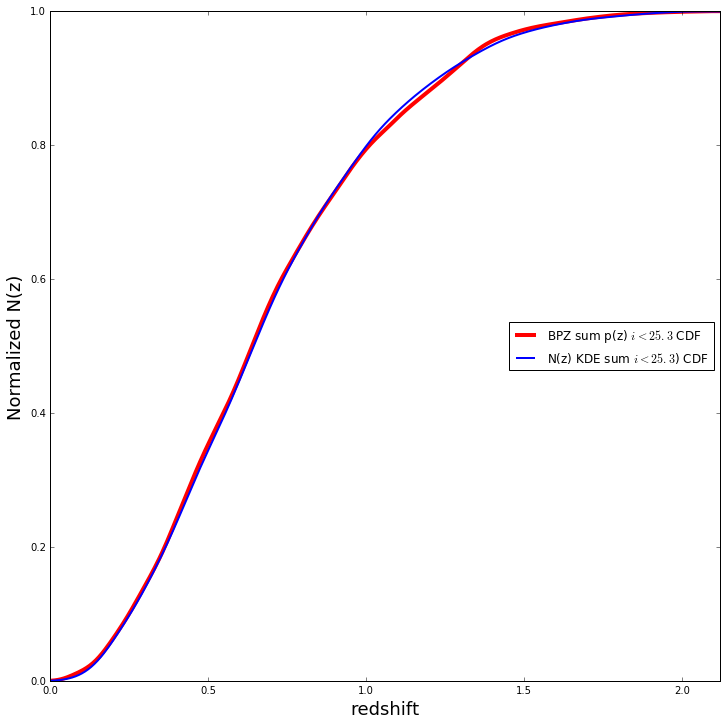

In [70]:
fig = plt.figure(figsize=(12,12))
plt.plot(goldpzsumvec[0],pzgoldcdf,lw=4,c='r',label='BPZ sum p(z) $i<25.3$ CDF')
plt.plot(goldsztruevec[0],szgoldcdf,lw=2,c='b',label='N(z) KDE sum $i<25.3$) CDF')
plt.xlabel('redshift',size=18)
plt.ylabel('Normalized N(z)',size=18)
plt.xlim([0,2.12])
plt.ylim([0.0,1.0])
plt.legend(loc=5)

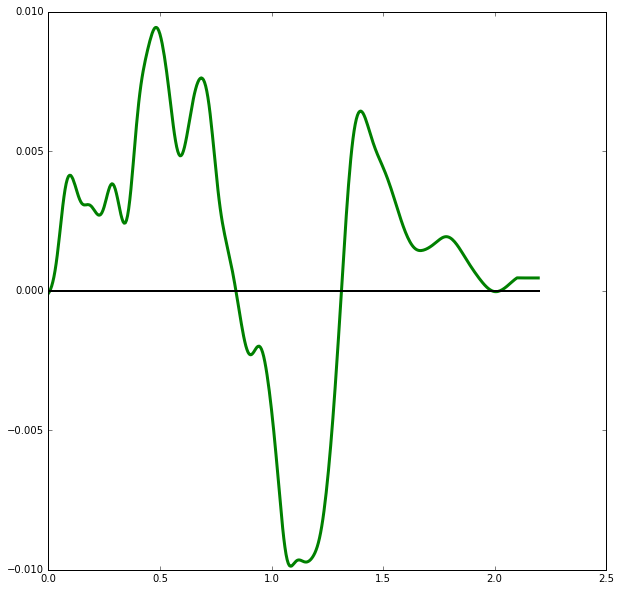

In [71]:
tmpdif = pzgoldcdf-szgoldcdf
figgy = plt.figure(figsize=(10,10))
plt.plot(plotarray,tmpdif,lw=3,c='g')
plt.plot([0,2.2],[0,0],lw=2,c='k')